# [MAGIC Gamma Telescope Data Set](http://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope)

### Attribute Information (from link):
1. fLength: continuous # major axis of ellipse [mm] 
2. fWidth: continuous # minor axis of ellipse [mm] 
3. fSize: continuous # 10-log of sum of content of all pixels [in #phot] 
4. fConc: continuous # ratio of sum of two highest pixels over fSize [ratio] 
5. fConc1: continuous # ratio of highest pixel over fSize [ratio] 
6. fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm] 
7. fM3Long: continuous # 3rd root of third moment along major axis [mm] 
8. fM3Trans: continuous # 3rd root of third moment along minor axis [mm] 
9. fAlpha: continuous # angle of major axis with vector to origin [deg] 
10. fDist: continuous # distance from origin to center of ellipse [mm] 
11. class: g,h # gamma (signal), hadron (background)



In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from IPython.display import display
from sklearn.model_selection import train_test_split

%matplotlib inline

In [116]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data'
names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
data = pd.read_csv(url, names=names)
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [130]:
#Need to convert 'g' and 'h' to 0 and 1 to be able to find area under ROC Curve
data['class'] = data['class'].map({'g':0, 'h':1})
gamma_class = data['class']
features = data.drop('class', axis = 1)

In [73]:
display(features.describe())

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


C:\Users\alros\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


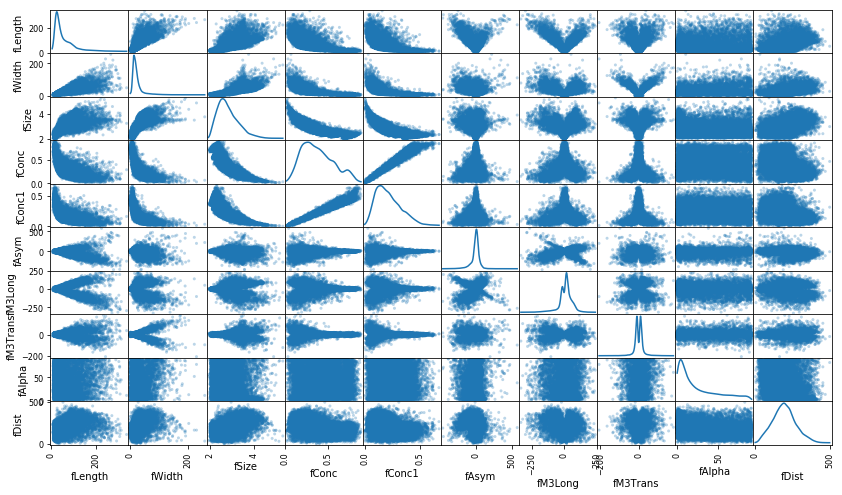

In [9]:
#pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [131]:
X_train, X_test, y_train, y_test = train_test_split(features, gamma_class, test_size = 0.2, random_state = 0)

In [184]:
def train_predict_plot(learners, X_train, X_test, y_train, y_test):
    roc = {}
    for learner in learners:
        
        learner_name = learner.__class__.__name__
        
        learner.fit(X_train, y_train)
        y_pred_prob = learner.predict_proba(X_test)[:,1]
        
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
        auc = metrics.roc_auc_score(y_test, y_pred_prob)
        roc[learner_name] = {'fpr':fpr, 'tpr':tpr, 'thresholds':thresholds, 'auc':auc}
        plt.plot(roc[learner_name]['fpr'],roc[learner_name]['tpr'], label = learner_name);
        print 'Area under ROC curve for {} is {:.4f}'.format(learner_name, roc[learner_name]['auc'])
        
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC Curves for Classifiers')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend();
    
    return roc

Area under ROC curve for DecisionTreeClassifier is 0.8406
Area under ROC curve for LogisticRegression is 0.8374


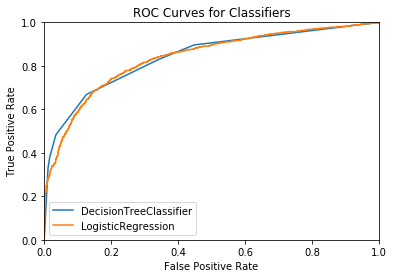

In [185]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

clf_A = DecisionTreeClassifier(random_state = 0, max_depth =3)
clf_B = LogisticRegression(random_state = 0)

learners = [clf_A, clf_B]

roc = train_predict_plot(learners, X_train, X_test, y_train, y_test)    
